Loading Data

In [33]:
#Loading data from keras
from tensorflow.keras.datasets import fashion_mnist
#Splitting data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Understanding Data

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


Visualizing Data

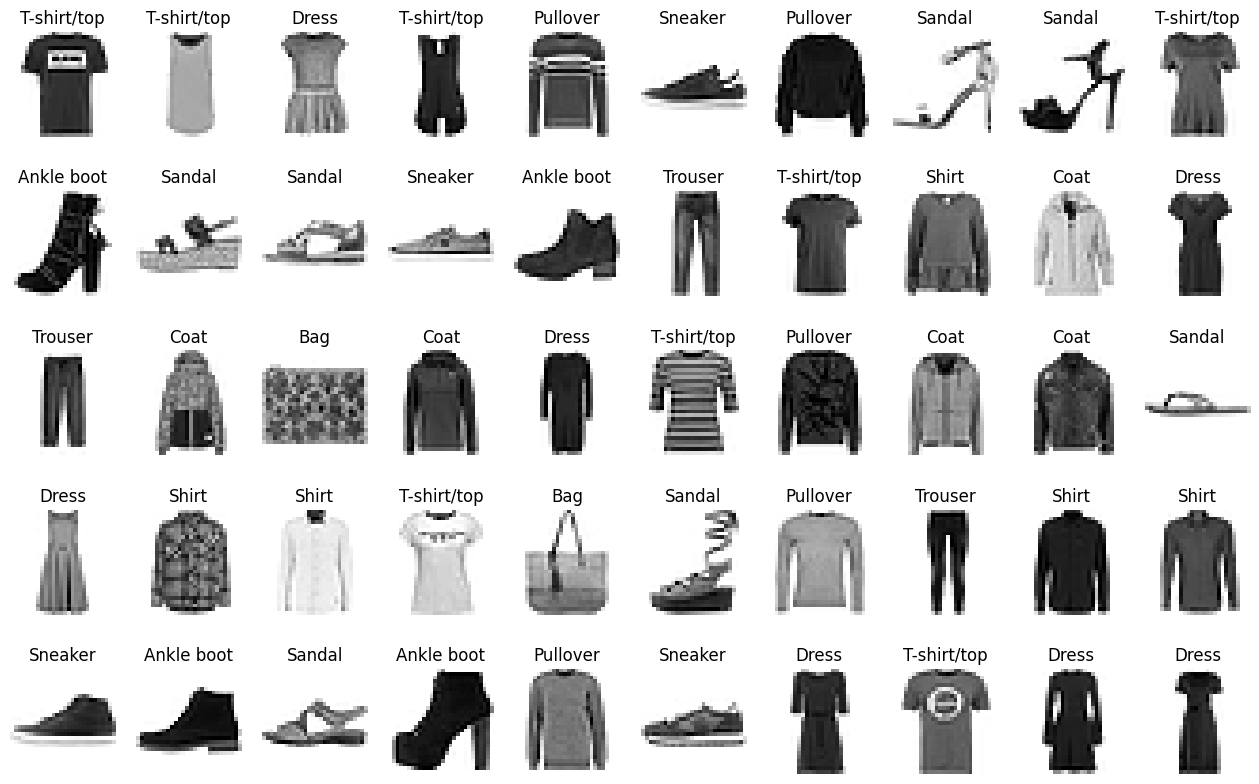

In [35]:
import matplotlib.pyplot as plt
images = 50

plt.figure(figsize=(16,10))
for i in range(1, images+1):
    class_name = classes[y_train[i]]
    plt.subplot(5, 10, i).set_title(class_name)
    plt.axis(False)
    plt.imshow(x_train[i], cmap = 'gray_r')

Data Preprocessing

In [36]:
#Storing input dimensions
rows = x_train[0].shape[0]
columns = x_train[0].shape[1]
inp_dim = (rows, columns, 1)
inp_dim

(28, 28, 1)

In [37]:
# OneHotEncoding on output variable
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train.shape

(60000, 10)

Building Model

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = inp_dim))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

Model Compiling

In [39]:
from tensorflow.keras.optimizers import SGD
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.002, momentum = 0.8),
              metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

Training Model 

In [40]:
model_fit = model.fit(x_train, y_train,
                      batch_size = 32, epochs = 10,
                      verbose = 1,
                      validation_data = (x_test, y_test))

evaluation = model.evaluate(x_test, y_test, verbose = 0)

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.6587 - accuracy: 0.8217 - val_loss: 0.3957 - val_accuracy: 0.8589
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3266 - accuracy: 0.8811 - val_loss: 0.3457 - val_accuracy: 0.8740
Epoch 3/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2816 - accuracy: 0.8965 - val_loss: 0.3273 - val_accuracy: 0.8806
Epoch 4/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2461 - accuracy: 0.9074 - val_loss: 0.3121 - val_accuracy: 0.8881
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2198 - accuracy: 0.9172 - val_loss: 0.3162 - val_accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1993 - accuracy: 0.9237 - val_loss: 0.3440 - val_accuracy: 0.8815
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1802 - accuracy: 0.9310 - val_loss: 0.3045 -

Predicting data

In [52]:
import numpy as np
prediction = np.argmax(model.predict(x_test), axis = -1)

313/313 [==============================] - 2s 6ms/step


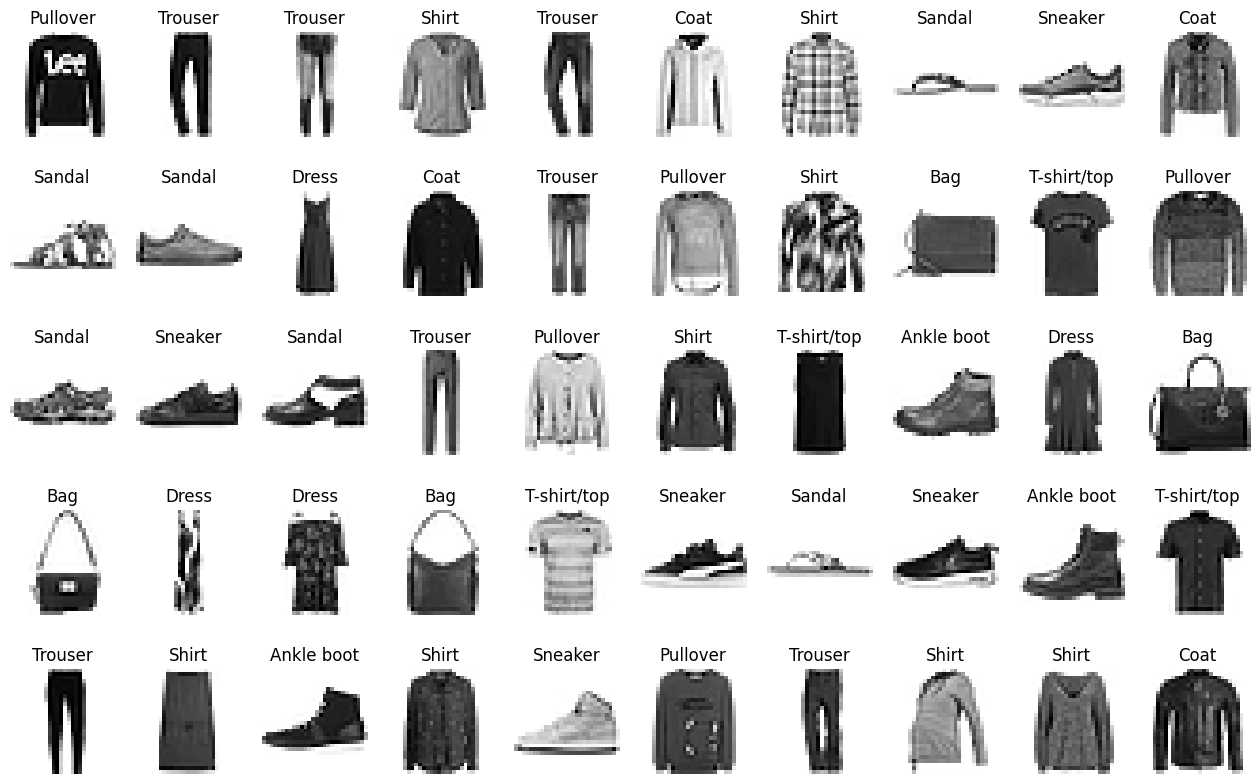

In [54]:
# First 50 predictions
images = 50
plt.figure(figsize = (16,10))

for i in range(1, images+1):
    class_name = classes[prediction[i]]
    plt.subplot(5, 10, i).set_title(class_name)
    plt.axis(False)
    plt.imshow(x_test[i], cmap = 'gray_r')